In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [3]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
N = y.shape[0] 

In [4]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_cost` function below:

In [5]:
def get_err(y, tx, w):
    return y-tx.dot(w)

def compute_loss(y, tx, w):

    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    err = get_err(y, tx, w)
    return 0.5/N * err.T.dot(err)
    # ***************************************************

# 2. Grid Search

Fill in the function `grid_search()` below:

In [6]:
# from costs import *

def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.
        
    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    for i, w0 in enumerate(grid_w0) : 
        for j, w1 in enumerate(grid_w1) :
            losses[i,j]=compute_loss(y, tx, [w0, w1])
            
            
    # ***************************************************
    return losses

Let us play with the grid search demo now!

In [37]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

def get_grid(num_intervals=10):
    return generate_w(num_intervals)
def show_plots(num_intervals=10) : 
    # Generate the grid of parameters to be swept
    grid_w0, grid_w1 = get_grid(num_intervals)

    # Start the grid search
    start_time = datetime.datetime.now()
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)

    # Select the best combinaison
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    end_time = datetime.datetime.now()
    execution_time = (end_time - start_time).total_seconds()

    # Print the results
    print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
          l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

    # Plot the results
    fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
    fig.set_size_inches(10.0,6.0)
    fig.savefig("grid_plot"+str(num_intervals))  # Optional saving
    return grid_losses

Grid Search: loss*=2.2053872685514815, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.000 seconds
Grid Search: loss*=1.436765796139156, w0*=71.42857142857142, w1*=9.183673469387742, execution time=0.016 seconds


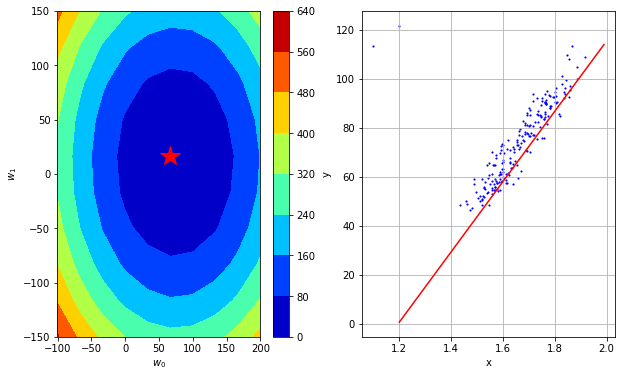

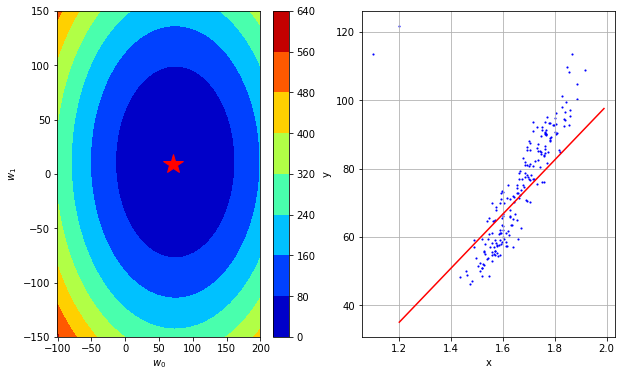

In [38]:
show_plots()
grid_losses = show_plots(50)

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [39]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient vector
    N = y.shape[0]
    gradient = -1/N * tx.T.dot(get_err(y, tx, w))
    # ***************************************************
    return gradient

In [40]:
print(compute_gradient(y,tx,[100,20]))
print(compute_gradient(y,tx,[50,10]))
print(compute_gradient(y,tx,[71,15]))
print(compute_gradient(y,tx,[0,0]))

[25.93219415  8.96510513]
[-24.06780585  -1.03489487]
[-3.06780585  3.96510513]
[-74.06780585 -11.03489487]


Please fill in the functions `gradient_descent` below:

In [41]:
def gradient_descent(y, tx, initial_w, max_iters, gamma, verbose = False):
    """The Gradient Descent (GD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        gradient = compute_gradient(y,tx,w)
        loss = compute_loss(y,tx,w)
        # ***************************************************
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        w = w - gamma* gradient
        # ***************************************************
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        if verbose :
            print("GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                  bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [42]:
# from gradient_descent import *
from plots import gradient_descent_visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

def play_with_gradient_descent(y, tx, initial_w= np.array([0, 0]), max_iters= 50, gamma=0.7, verbose = False):

    # Start gradient descent.
    start_time = datetime.datetime.now()
    gd_losses, gd_ws = gradient_descent(y, tx, initial_w, max_iters, gamma)
    end_time = datetime.datetime.now()

    # Print result
    exection_time = (end_time - start_time).total_seconds()
    if verbose :
        print("GD: execution time={t:.3f} seconds".format(t=exection_time))
        
    grid_w0, grid_w1 = get_grid(num_intervals = 10)
    def plot_figure(n_iter):
        fig = gradient_descent_visualization(
            gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
        fig.set_size_inches(10.0, 6.0)
    
    interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))


Gradient descent with w = [0, 0] and gamma = 0.7


interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

Gradient descent with w = [100, 10] and gamma = 0.7


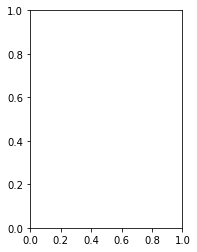

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

Gradient descent with w = [-1000, 1000] and gamma = 0.7


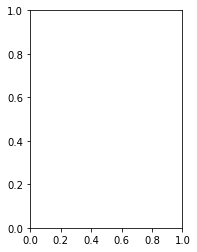

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

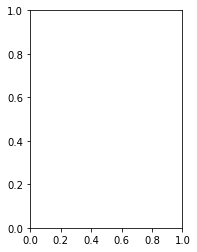

In [43]:
initial_ws = [[0,0],[100,10],[-1000,1000]]
gammas = [0.001,0.01,0.5, 1,2,2.5]

gamma = 0.7
for w in initial_ws :
    print("Gradient descent with w = "+str(w)+" and gamma = "+str(gamma))
    play_with_gradient_descent(y,tx, w ,max_iters= 50, gamma=gamma, verbose = False)



Gradient descent with w = [-20, -50] and gamma = 0.001
GD: execution time=0.000 seconds


interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

Gradient descent with w = [-20, -50] and gamma = 0.01
GD: execution time=0.000 seconds


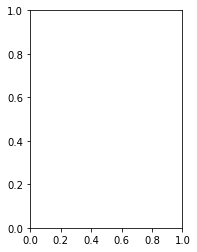

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

Gradient descent with w = [-20, -50] and gamma = 0.5
GD: execution time=0.000 seconds


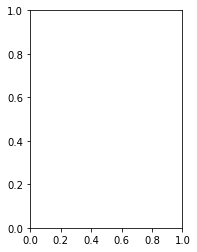

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

Gradient descent with w = [-20, -50] and gamma = 1
GD: execution time=0.000 seconds


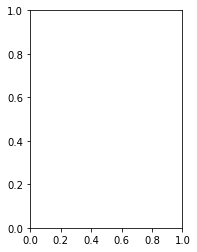

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

Gradient descent with w = [-20, -50] and gamma = 2
GD: execution time=0.000 seconds


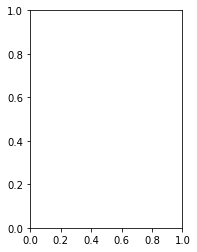

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

Gradient descent with w = [-20, -50] and gamma = 2.5
GD: execution time=0.000 seconds


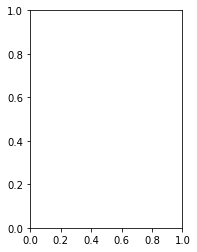

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

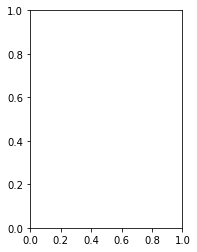

In [36]:
w = [-20,-50]
for gamma in gammas:
    print("Gradient descent with w = "+str(w)+" and gamma = "+str(gamma))
    play_with_gradient_descent(y,tx, w ,max_iters= 50, gamma=gamma, verbose = True)

# 4. Stochastic gradient descent

In [15]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    gradient = compute_gradient(y, tx, w )
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    # ***************************************************
    return gradient


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
         # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        gradient = None
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            gradient = compute_stoch_gradient(minibatch_y, minibatch_tx,w)
        loss = compute_loss(y,tx,w)
        # ***************************************************
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        w = w - gamma* gradient
        # ***************************************************
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [16]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 50

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2792.236712759167, w0=50.08080664606893, w1=1.2031138493963716
SGD iter. 1/49: loss=360.1676865510404, w0=66.83558435470279, w1=11.20624639085444
SGD iter. 2/49: loss=38.82527437967351, w0=70.2384854636353, w1=12.185029947369072
SGD iter. 3/49: loss=20.891835461012754, w0=72.63689230245117, w1=12.026517464984826
SGD iter. 4/49: loss=16.65761969236591, w0=74.00490428248001, w1=12.925406926018306
SGD iter. 5/49: loss=15.79226306897055, w0=74.16992392607968, w1=12.725725041807877
SGD iter. 6/49: loss=16.053826048770972, w0=73.89952224522887, w1=13.044819733525332
SGD iter. 7/49: loss=15.663829526958336, w0=73.18593481651006, w1=13.821501548924465
SGD iter. 8/49: loss=15.450128384158159, w0=73.3675012215769, w1=14.555197306759014
SGD iter. 9/49: loss=15.966928674301466, w0=73.98006167388634, w1=14.179444082880636
SGD iter. 10/49: loss=15.866093882955909, w0=73.78569027614652, w1=13.519781523776611
SGD iter. 11/49: loss=15.50760865244433, w0=73.92553985875294, w1=13.319

In [17]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [18]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
# ***************************************************


x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [19]:
y.shape, tx.shape

((202,), (202, 2))

In [20]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()


gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma, True)


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=57.97066931362423, w0=51.84746409844842, w1=7.7244264061924195
GD iter. 1/49: loss=6.42929891897225, w0=67.40170332798297, w1=10.041754328050114
GD iter. 2/49: loss=1.7905755834535588, w0=72.06797509684336, w1=10.736952704607411
GD iter. 3/49: loss=1.373090483256875, w0=73.46785662750146, w1=10.945512217574597
GD iter. 4/49: loss=1.3355168242391737, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=1.332135194927581, w0=74.01381042445813, w1=11.026850427631798
GD iter. 6/49: loss=1.3318308482895376, w0=74.0516072257859, w1=11.032481534481914
GD iter. 7/49: loss=1.3318034570921136, w0=74.06294626618423, w1=11.034170866536945
GD iter. 8/49: loss=1.3318009918843454, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=1.3318007700156462, w0=74.06736849193958, w1=11.034829706038408
GD iter. 10/49: loss=1.3318007500474633, w0=74.06767464603033, w1=11.034875318003895
GD iter. 11/49: loss=1.331800748250327, w0=74.06776649225755, w1=11.03488900159354

In [21]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [22]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE
    N = y.shape[0]
    return -1/N * tx.T.dot(np.sign(get_err(y,tx,w)))
    # ***************************************************
def compute_loss_mae(y,tx,w):
    return np.abs(get_err(y,tx,w)).sum()
compute_subgradient_mae(y,tx,w)

array([-0.93069307, -0.17126666])

In [23]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        subgradient = compute_subgradient_mae(y, tx, w)
        # ***************************************************
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        w = w -gamma * subgradient
        # ***************************************************
        loss = compute_loss_mae(y,tx,w)
        ws.append(w)
        losses.append(loss)
        print("SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [24]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(
    y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=14820.296782695128, w0=0.7, w1=6.109524327590712e-16
SubGD iter. 1/499: loss=14678.896782695127, w0=1.4, w1=1.2219048655181425e-15
SubGD iter. 2/499: loss=14537.496782695129, w0=2.0999999999999996, w1=1.832857298277214e-15
SubGD iter. 3/499: loss=14396.096782695127, w0=2.8, w1=2.443809731036285e-15
SubGD iter. 4/499: loss=14254.69678269513, w0=3.5, w1=3.054762163795356e-15
SubGD iter. 5/499: loss=14113.296782695128, w0=4.2, w1=3.665714596554428e-15
SubGD iter. 6/499: loss=13971.896782695128, w0=4.9, w1=4.276667029313499e-15
SubGD iter. 7/499: loss=13830.496782695127, w0=5.6000000000000005, w1=4.887619462072571e-15
SubGD iter. 8/499: loss=13689.096782695127, w0=6.300000000000001, w1=5.498571894831642e-15
SubGD iter. 9/499: loss=13547.69678269513, w0=7.000000000000001, w1=6.109524327590714e-15
SubGD iter. 10/499: loss=13406.296782695128, w0=7.700000000000001, w1=6.720476760349785e-15
SubGD iter. 11/499: loss=13264.896782695128, w0=8.4, w1=7.331429193108857e-15
Sub

In [25]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses, subgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [26]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic SubGradient Descent algorithm (SubSGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):

        subgradient = None
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            subgradient = compute_subgradient_mae(minibatch_y, minibatch_tx,w)
        loss = compute_loss_mae(y,tx,w)
        
        w = w - gamma* subgradient
        ws.append(w)
        losses.append(loss)
        # ***************************************************
        
        print("SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [27]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=14961.696782695128, w0=0.7, w1=1.0926245143257944
SubSGD iter. 1/499: loss=14820.296782695128, w0=1.4, w1=0.8100766952395693
SubSGD iter. 2/499: loss=14678.896782695127, w0=2.0999999999999996, w1=0.39900151069734335
SubSGD iter. 3/499: loss=14537.496782695129, w0=2.8, w1=1.4569168175249017
SubSGD iter. 4/499: loss=14396.096782695127, w0=3.5, w1=2.062319968968886
SubSGD iter. 5/499: loss=14254.696782695128, w0=4.2, w1=1.383972972994343
SubSGD iter. 6/499: loss=14113.296782695128, w0=4.9, w1=2.118248716486142
SubSGD iter. 7/499: loss=13971.896782695128, w0=5.6000000000000005, w1=2.7417368387723196
SubSGD iter. 8/499: loss=13830.496782695129, w0=6.300000000000001, w1=-0.028562858116669698
SubSGD iter. 9/499: loss=13689.096782695127, w0=7.000000000000001, w1=-0.3788997914850608
SubSGD iter. 10/499: loss=13547.69678269513, w0=7.700000000000001, w1=-1.1787305255477705
SubSGD iter. 11/499: loss=13406.296782695128, w0=8.4, w1=-1.0258367684331888
SubSGD iter. 12/499: lo

In [28]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses, subsgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>